# 電気回路１で使用する解析プログラム例

担当:風間慎吾

所属:名古屋大学素粒子宇宙起源研究所

連絡先: kazama@isee.nagoya-u.ac.jp

専門: 宇宙暗黒物質の実験的探索

このプログラムでは、Google Colaboratoryを使用します。

使用に際しては[Gmailアカウント](https://www.google.co.jp/mail/help/intl/ja/about.html?vm=r)が必要になります。
まず初めにGmailアカウントを作成し、ログインをお願いします。

ログイン後、以下のURLを開き、下記に示すコードをコピペなどして試してみてください

https://colab.research.google.com/

使用に際しての詳細な解説は以下の1-0を参照ください*

pythonのプログラミングの解説もあり、プログラミング初心者には非常に良い教材です。

https://utokyo-ipp.github.io/index.html

*出典: 東京大学 数理・情報教育研究センター 


#それでは、実際にコードを書いていきましょう

このノートブックでは、実験で得られたデータを図示するのに必要最低限なpythonプログラムについて解説します。

最初は慣れることが重要なので、ほとんどコピペで問題なく、実験データの部分を手で書き換えてもらえたらと思います

はじめにpythonの数値計算ツール(ライブラリー)を読み込みます。
これをimportと呼びます。

ちなみにpythonでは、#を先頭につけたラインはコメントとして扱われ、プログラムには関与しません。

また、プログラミングでは全角文字は認識されないので、半角文字を使ってください。

プログラムの各行はShift＋Enterを押すことで実行されます。

In [1]:
#こちらは表計算のライブラリーでエクセルの上位互換みたいなものと思ってください。
import pandas as pd 

#こちらは高度な数式計算を行ってくれるライブラリーです。
import numpy as np 

#こちらはグラフ描画ツールです。
import matplotlib.pyplot as plt

以下では、用いた回路の定数を定義しています。
1e-3は10の-3乗を表し、0.001です。

In [2]:
L = 22.*1e-3 # インダクタンスインダクタンス [H]
C = 0.001*1e-6 # 静電容量静電容量 [F]
R = 1e3 # 抵抗 [Ohm]

#共振周波数の計算です。numpyを使って計算しています。
f_res = 1./(2.*np.pi*np.sqrt(L*C))/1e3
print("expected resonance frequency = %.2f kHz" % f_res)

expected resonance frequency = 33.93 kHz


まず初めに空のデータフレームフレーム(エクセルのスプレッドシートの様なもの)を定義します

columnsとは各行のインデックスに対応し、実験では周波数(frequency[kHz])、チャンネル1,2の電圧、時間差などを測定します。

dfはdataframeの略語で、変数名なので名前はなんでも良いです。繰り返し書くので短い方が良く、ここではdfとしてますが、pen, appleなどなんでも良いです。

In [10]:
df = pd.DataFrame(columns=['freq', 'V1', 'V2', 'dt'])

In [11]:
df = df.append({'freq': 10, 'V1': 5, 'V2': 2.62, 'dt': 0}, ignore_index=True)
df = df.append({'freq': 15, 'V1': 5, 'V2': 1.78, 'dt': 0}, ignore_index=True)
df = df.append({'freq': 20, 'V1': 5, 'V2': 1.19, 'dt': 0}, ignore_index=True)
df = df.append({'freq': 25, 'V1': 5, 'V2': 0.715, 'dt': 0}, ignore_index=True)
df = df.append({'freq': 30, 'V1': 5, 'V2': 0.338,'dt': 0}, ignore_index=True)
df = df.append({'freq': 31, 'V1': 5, 'V2': 0.271,'dt': 0}, ignore_index=True)
df = df.append({'freq': 32, 'V1': 5, 'V2': 0.207,'dt': 0}, ignore_index=True)
df = df.append({'freq': 33, 'V1': 5, 'V2': 0.146,'dt': 0}, ignore_index=True)
df = df.append({'freq': 34, 'V1': 5, 'V2': 0.0954,'dt': 0}, ignore_index=True)
df = df.append({'freq': 35, 'V1': 5, 'V2': 0.0565,'dt': 0}, ignore_index=True)
df = df.append({'freq': 36, 'V1': 5, 'V2': 0.0743,'dt': 0}, ignore_index=True)
df = df.append({'freq': 37, 'V1': 5, 'V2': 0.122,'dt': 0}, ignore_index=True)
df = df.append({'freq': 40, 'V1': 5, 'V2': 0.262,'dt': 0}, ignore_index=True)
df = df.append({'freq': 45, 'V1': 5, 'V2': 0.495,'dt': 0}, ignore_index=True)
df = df.append({'freq': 50, 'V1': 5, 'V2': 0.698,'dt': 0}, ignore_index=True)
df #最後にdfと打つことで、dataframeの中身を出力してくれます

#上の様に定義するのが嫌な人は下記の様な方法でも良いです。この場合、各配列の順番は揃ってないといけません。
#各要素の値が全て同じ場合、いちいち書くのは面倒なので、その場合はdf["V1"]=5などとすると良いです。

#df['freq']=[10,15,20,25,30,31,32,33,34,35,36,37,40,45,50]
#df['V1']=5
#df['V2']=[2.62, 1.78, 1.19, 0.715, 0.338, 0.271, 0.207, 0.146, 0.954, 0.0565, 0.0743, 0.122, 0.262, 0.495, 0.698]
#df['dt']=0


,freq,V1,V2,dt
0,10.0,5.0,2.6200,0.0
1,15.0,5.0,1.7800,0.0
2,20.0,5.0,1.1900,0.0
3,25.0,5.0,0.7150,0.0
4,30.0,5.0,0.3380,0.0
5,31.0,5.0,0.2710,0.0
6,32.0,5.0,0.2070,0.0
7,33.0,5.0,0.1460,0.0
8,34.0,5.0,0.0954,0.0
9,35.0,5.0,0.0565,0.0


In [12]:
#もし例えば、1行目(プログラムの配列は0からスタートするので0番目)の値を変えたい時は以下のようにすれば良い。
df.loc[0] = [10, 5, 2.63, 0]

df #出力させて上の出力結果との違いを見てみましょう

# 2行目の値を変えたい場合は、df.loc[1] = [15, 5, 1.79, 0]などとすれば良いです。

,freq,V1,V2,dt
0,10.0,5.0,2.6300,0.0
1,15.0,5.0,1.7800,0.0
2,20.0,5.0,1.1900,0.0
3,25.0,5.0,0.7150,0.0
4,30.0,5.0,0.3380,0.0
5,31.0,5.0,0.2710,0.0
6,32.0,5.0,0.2070,0.0
7,33.0,5.0,0.1460,0.0
8,34.0,5.0,0.0954,0.0
9,35.0,5.0,0.0565,0.0


##以下では、matplotlibというライブラリーを用いて得られた結果を図示します


matplotlibの説明は以下をご覧ください

https://utokyo-ipp.github.io/appendix/5-matplotlib.html

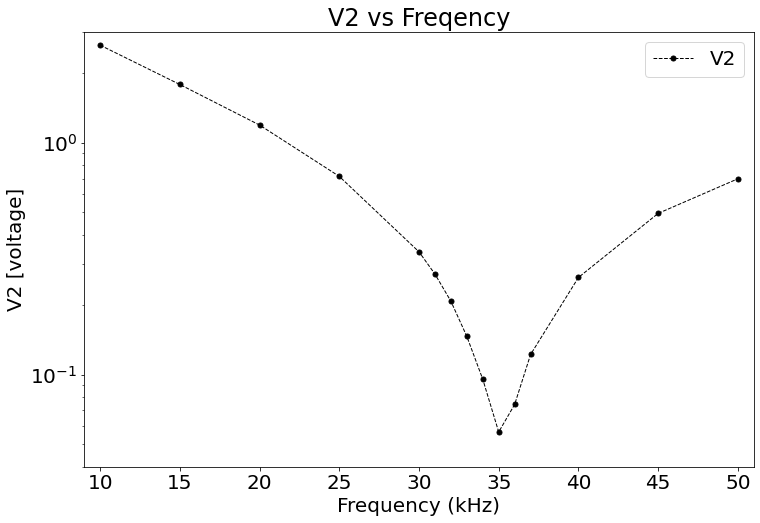

In [6]:
#実験により得られた値の相関などを調べるため、グラフを書きます。


#図の大きさと文字のフォントサイズの調整です
plt.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure(facecolor = 'w')
plt.rc('font', size='20') 

#周波数とV2の関係性を描いてみる
plt.plot(df["freq"], df["V2"], 
         marker='.', markersize=10, color='black', label='V2', linestyle="--", linewidth=1)

plt.title("V2 vs Freqency")
plt.xlabel("Frequency (kHz)")
plt.ylabel("V2 [voltage]")
plt.xlim(9,51)
plt.ylim(4e-2,3)
plt.legend()
plt.yscale("log")
plt.savefig("plot_log_scale.pdf")
plt.show()

### 図を選択して、ドラッグ&ドロップでデスクトップ上に引っ張ってくると図が保存できます

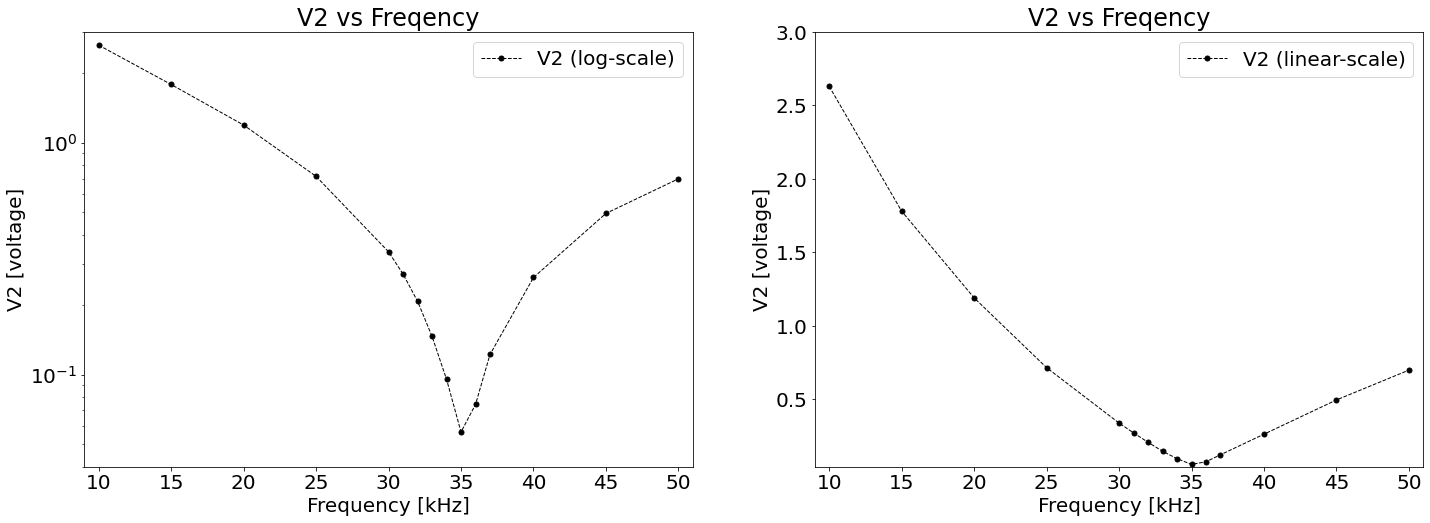

In [7]:
#y軸がlogスケールとlinearスケールの二つのグラフを描いてみる
plt.rcParams['figure.figsize'] = (24, 8)
fig = plt.figure(facecolor = 'w')
plt.rc('font', size='20') 

#まずは一つ目: logスケール
plt.subplot(1, 2, 1)
plt.plot(df["freq"], df["V2"], 
         marker='.', markersize=10, color='black', label='V2 (log-scale)', linestyle="--", linewidth=1)

plt.title("V2 vs Freqency")
plt.xlabel("Frequency [kHz]")
plt.ylabel("V2 [voltage]")
plt.xlim(9,51)
plt.ylim(4e-2,3)
plt.legend()
plt.yscale("log")

#次に二つ目: linearスケール
plt.subplot(1, 2, 2)
plt.plot(df["freq"], df["V2"], 
         marker='.', markersize=10, color='black', label='V2 (linear-scale)', linestyle="--", linewidth=1)

plt.title("V2 vs Freqency")
plt.xlabel("Frequency [kHz]")
plt.ylabel("V2 [voltage]")
plt.xlim(9,51)
plt.ylim(4e-2,3)
plt.legend()
#plt.yscale("log") #ここをコメントアウトします

plt.savefig("plot.pdf")
plt.show()

### 例えばすでに定義されている変数を用いて、新しい変数を定義したい場合は以下のようにすると良いです。

In [14]:
# V2/V1を定義したい場合
df["V2_over_V1"] = df["V2"]/df["V1"]
df

,freq,V1,V2,dt,V2_over_V1
0,10.0,5.0,2.6300,0.0,0.52600
1,15.0,5.0,1.7800,0.0,0.35600
2,20.0,5.0,1.1900,0.0,0.23800
3,25.0,5.0,0.7150,0.0,0.14300
4,30.0,5.0,0.3380,0.0,0.06760
5,31.0,5.0,0.2710,0.0,0.05420
6,32.0,5.0,0.2070,0.0,0.04140
7,33.0,5.0,0.1460,0.0,0.02920
8,34.0,5.0,0.0954,0.0,0.01908
9,35.0,5.0,0.0565,0.0,0.01130
